<a href="https://colab.research.google.com/github/AleksandrRevuka/HW_Data_Science/blob/main/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

Saving bestsellers with categories.csv to bestsellers with categories.csv


In [127]:
import pandas as pd

data = pd.read_csv("bestsellers with categories.csv")

bestsellers_with_categories = pd.DataFrame(data)

bestsellers_with_categories.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

bestsellers_with_categories.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [13]:
rows, colums = bestsellers_with_categories.shape
print(f"rows: {rows}\ncolums: {colums}")

rows: 550
colums: 7


**Про скільки книг зберігає дані датасет?** *Відповідь: 550*

# Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [10]:
missing_data = bestsellers_with_categories.isna().sum()

print("Share missing:")
print(missing_data)

Share missing:
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


**Чи є в якихось змінних пропуски?** *Відповідь: ні*

# Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [52]:
unique_values = bestsellers_with_categories['genre'].unique()

print(f"Які є унікальні жанри? Відповідь: {unique_values}")

Які є унікальні жанри? Відповідь: ['Non Fiction' 'Fiction']


# Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

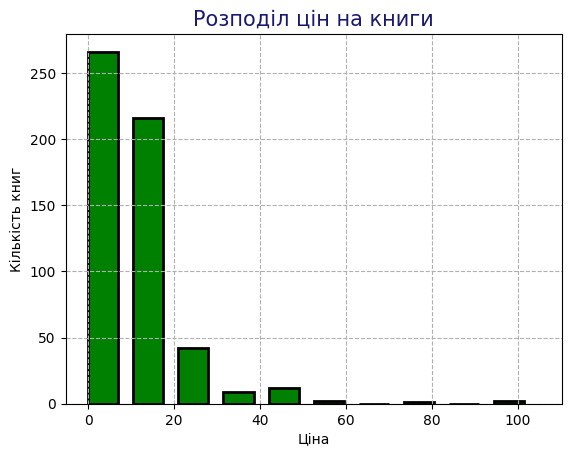

In [48]:
import matplotlib.pyplot as plt

bestsellers_with_categories.price.plot(kind='hist', color="green", width=7, edgecolor="black", linewidth=2)

plt.title('Розподіл цін на книги', color="midnightblue", fontsize=15)
plt.xlabel('Ціна')
plt.ylabel('Кількість книг')
plt.grid(linestyle='--')

plt.show()

# Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [51]:
max_price = bestsellers_with_categories['price'].max()

min_price = bestsellers_with_categories['price'].min()

mean_price = bestsellers_with_categories['price'].mean()

median_price = bestsellers_with_categories['price'].median()

print(f"Максимальна ціна? Відповідь: {max_price}")
print(f"Мінімальна ціна? Відповідь: {min_price}")
print(f"Середня ціна? Відповідь: {mean_price}")
print(f"Медіанна ціна? Відповідь: {median_price}")

Максимальна ціна? Відповідь: 105
Мінімальна ціна? Відповідь: 0
Середня ціна? Відповідь: 13.1
Медіанна ціна? Відповідь: 11.0


# Пошук та сортування даних

In [53]:
max_user_rating = bestsellers_with_categories['user_rating'].max()

print(f"Який рейтинг у датасеті найвищий? Відповідь: {max_user_rating}")

Який рейтинг у датасеті найвищий? Відповідь: 4.9


In [55]:
number_books_max_rating = len(bestsellers_with_categories[bestsellers_with_categories['user_rating'] == 4.9])

print(f"Скільки книг мають такий рейтинг? Відповідь: {number_books_max_rating}")

Скільки книг мають такий рейтинг? Відповідь: 52


In [66]:
books_whith_max_reviews = bestsellers_with_categories[bestsellers_with_categories['reviews'] == bestsellers_with_categories['reviews'].max()]

print(f"Яка книга має найбільше відгуків? Відповідь: {books_whith_max_reviews.name.values[0]}")

Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing


In [72]:
top_books_2015 = bestsellers_with_categories[bestsellers_with_categories['year'] == 2015]

most_expensive_book = top_books_2015[top_books_2015['price'] == top_books_2015['price'].max()]

print(f"З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: {most_expensive_book.name.values[0]}")

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: Publication Manual of the American Psychological Association, 6th Edition


In [74]:
fiction_books_2010 = bestsellers_with_categories[(bestsellers_with_categories['genre'] == "Fiction") & (bestsellers_with_categories['year'] == 2010)]

count_fiction_books_2010 = fiction_books_2010.shape[0]

print(f"Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: {count_fiction_books_2010}")

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20


In [76]:
selected_years = [2010, 2011]
books_with_rating_4_9 = bestsellers_with_categories[(bestsellers_with_categories['user_rating'] == 4.9) & (bestsellers_with_categories['year'].isin(selected_years))]

count_books_with_rating_4_9 = books_with_rating_4_9.shape[0]

print(f"Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: {count_books_with_rating_4_9}")

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1


In [126]:
top_books_2015_filter = top_books_2015[top_books_2015['price'] < 8]
sort_top_books_2015 = top_books_2015_filter.sort_values(by=['price'])

last_book_sort_top_books_2015 = sort_top_books_2015[-1:]

print(f"Яка книга остання у відсортованому списку? Відповідь: {last_book_sort_top_books_2015.name.values[0]}")

Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)


# Агрегування даних та з'єднання таблиць

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [108]:
selected_columns = ["genre", "price"]
price_fiction = bestsellers_with_categories[selected_columns].groupby("genre").agg({"price": ["min", "max"]})

price_fiction.columns = ["min_price", "max_price"]

for genre in price_fiction.index:
    max_price = price_fiction.loc[genre, "max_price"]
    min_price = price_fiction.loc[genre, "min_price"]
    print(f"Максимальна ціна для жанру {genre}: {max_price}")
    print(f"Мінімальна ціна для жанру {genre}: {min_price}")

Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction: 0
Максимальна ціна для жанру Non Fiction: 105
Мінімальна ціна для жанру Non Fiction: 0


Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [111]:
selected_columns = ["name", "author"]

author_name_books = bestsellers_with_categories[selected_columns].groupby("author").agg({"name": ["count"]})

author_name_books.columns = ["book_count"]

author = author_name_books["book_count"].idxmax()
count_books = author_name_books["book_count"].max()

print(f"Якої розмірності вийшла таблиця? Відповідь: {author_name_books.shape}")
print(f"Який автор має найбільше книг? Відповідь: {author}")
print(f"Скільки книг цього автора? Відповідь: {count_books}")

Якої розмірності вийшла таблиця? Відповідь: (248, 1)
Який автор має найбільше книг? Відповідь: Jeff Kinney
Скільки книг цього автора? Відповідь: 12


Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [113]:
selected_columns = ["user_rating", "author"]

author_user_rating = bestsellers_with_categories[selected_columns].groupby("author").agg({"user_rating": ["mean"]})

author_user_rating.columns = ["rating_mean"]

author = author_user_rating["rating_mean"].idxmin()
mean_rating = author_user_rating["rating_mean"].min()

print(f"У якого автора середній рейтинг мінімальний? Відповідь: {author}")
print(f"Який у цього автора середній рейтинг? Відповідь: {mean_rating}")

У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
Який у цього автора середній рейтинг? Відповідь: 3.9


З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [124]:
merged_authors = pd.concat([author_name_books, author_user_rating], axis=1)

merged_authors = merged_authors.sort_values(by=["book_count", "rating_mean"])

print(f"Який автор перший у списку? Відповідь: {merged_authors.index[0]}")

Який автор перший у списку? Відповідь: Muriel Barbery


додайте від 3 до 5 графіків функцій різного типу на ваш вибір. Задайте графікам оформлення, щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші. Можна використовувати як matplotlib, так і seaborn.

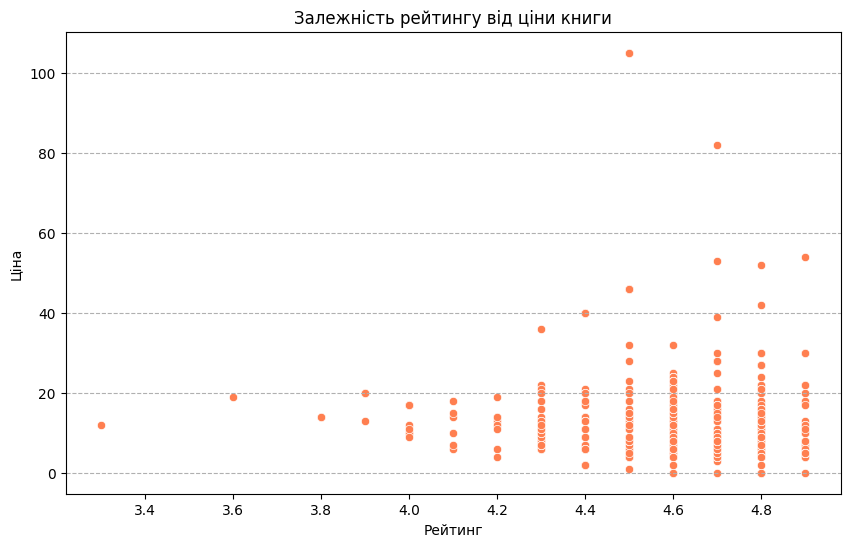

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_rating', y='price', data=bestsellers_with_categories, color='coral')
plt.title('Залежність рейтингу від ціни книги')
plt.xlabel('Рейтинг')
plt.ylabel('Ціна')
plt.grid(linestyle='--', axis='y')

plt.show()

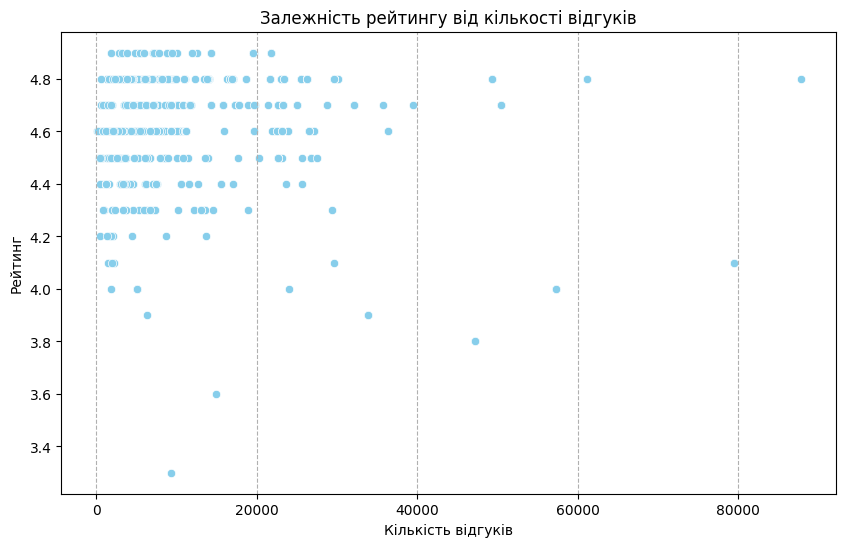

In [139]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reviews', y='user_rating', data=bestsellers_with_categories, color='skyblue')
plt.title('Залежність рейтингу від кількості відгуків')
plt.xlabel('Кількість відгуків')
plt.ylabel('Рейтинг')
plt.grid(linestyle='--', axis='x')

plt.show()

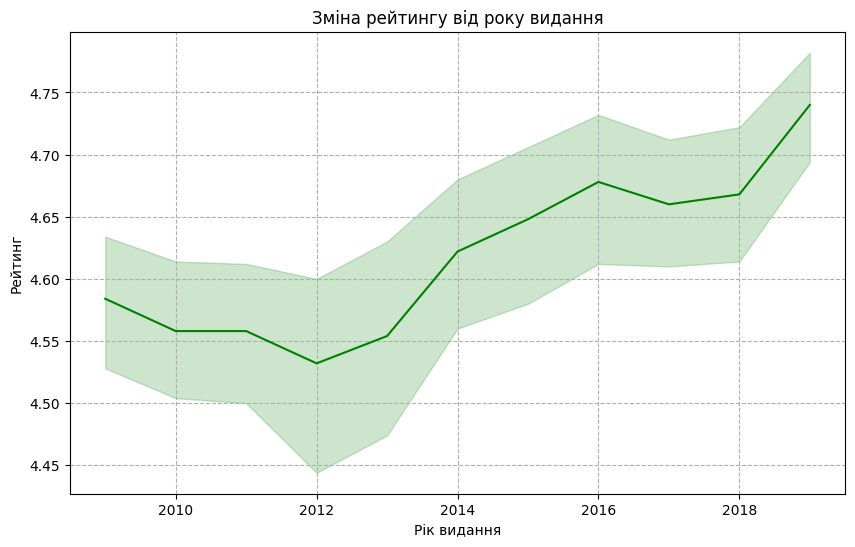

In [136]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='user_rating', data=bestsellers_with_categories, color='green')
plt.title('Зміна рейтингу від року видання')
plt.xlabel('Рік видання')
plt.ylabel('Рейтинг')
plt.grid(linestyle='--')

plt.show()